In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import scipy as sc, scipy.io
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib.colors import LightSource
import matplotlib as mpl

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
import quicklook

%matplotlib inline

In [2]:
idealf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')
ideal = idealf['Bathymetry'][:]
realf = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/real_bathy_for_agrif_fix.nc')
real = realf['Bathymetry'][:]
coordsf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/NEMO_files/coords_for_agrif.nc')
maskfi = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_base/mesh_mask.nc')
maskfr = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/extended_domain/real_base/mesh_mask.nc')

In [3]:
# ibcao_file = scipy.io.netcdf_file('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/data/IBCAO_V3_30arcsec_RR.grd')
# x = ibcao_file.variables['x'][:]
# y = ibcao_file.variables['y'][:]
# z = ibcao_file.variables['z'][:]

In [4]:
# x_start = 200
# x_end = 230
# y_start = 45
# y_end = 190
# dep_start = 2
# dep_end = 6 #changed from 5 in shelf_currents.ipynb

# fname = "1_MCKNZ_1h_20170101_201701*"
# meshmaskname = '1_mesh_mask.nc'
# flag = 'U'

# dirname='/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_half/'
# vozocrtx_h, umask_h, umask_all_h, depthu_h, e1u, e2u, sozotaux_h = quicklook.get_vars_for_box(dirname, fname, meshmaskname, x_start, x_end, y_start, y_end, flag)
# avgU_all_ys_h, avgU_all_depths_h, avgU_box_depths_h, avgU_absolute_h = quicklook.calculate_avg_vel(vozocrtx_h, dep_start, dep_end)

# dirname='/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_base/'
# vozocrtx_b, umask_b, umask_all_b, depthu_b, e1u, e2u, sozotaux_b = quicklook.get_vars_for_box(dirname, fname, meshmaskname, x_start, x_end, y_start, y_end, flag)
# avgU_all_ys_b, avgU_all_depths_b, avgU_box_depths_b, avgU_absolute_b = quicklook.calculate_avg_vel(vozocrtx_b, dep_start, dep_end)

# dirname='/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_double/'
# vozocrtx_d, umask_d, umask_all_d, depthu_d, e1u, e2u, sozotaux_d = quicklook.get_vars_for_box(dirname, fname, meshmaskname, x_start, x_end, y_start, y_end, flag)
# avgU_all_ys_d, avgU_all_depths_d, avgU_box_depths_d, avgU_absolute_d = quicklook.calculate_avg_vel(vozocrtx_d, dep_start, dep_end)

# winds = [sozotaux_h, sozotaux_b, sozotaux_d]
# currents = [general_functions.smooth(avgU_absolute_h[:], 12), 
#             general_functions.smooth(avgU_absolute_b[:], 12),
#             general_functions.smooth(avgU_absolute_d[:], 12)]

In [5]:
def plot_conditions(ax4, ax5, winds, currents):
    
    lw, ms, fs_numb, fs_str = 2.5, 12, 25*0.7, 30*0.7
    
    for ax in (ax4, ax5):
        ax.tick_params(direction='in', length=4, color='k', labelsize=fs_numb)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none')
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
    
    for ax, array, n in zip([ax4, ax5], [winds, currents], np.arange(2)):
        l1 = ax.plot(array[0], c='#EABE5D', lw=lw, label='half')
        l2 = ax.plot(array[1], c='#BA7BA1', lw=lw, label='base')
        l3 = ax.plot(array[2], c='#734B5E', lw=lw, label='double')
        ax.axhline(0, linestyle='-', c='k', linewidth=1.5)
        ax.set_xlim([0, 6*24-1])
        ax.xaxis.set_ticks(np.arange(24, 6*24, 24))
        ax.grid(which='major', axis='x', linestyle='--', lw=2)
        if n == 0:
            max_y, ind_y, lab, lab_y = 1.2, 0.5, 'a', 0.8
            ax.text(76, max_y*0.55, 'Wind stress '+r'$\tau_x$ [Nm$^{-2}$]', fontsize=fs_str)
            ax.set_ylim([-2.0, max_y])
            ax.yaxis.set_ticks([0,-2.0])
            lns = l1 + l2 + l3
            labels = [l.get_label() for l in lns]
            ax.legend(lns, labels, loc=4, fontsize=fs_str, ncol=3, frameon=False)
        elif n == 1:
            max_y, ind_y, lab, lab_y = 0.3, 0.1, 'b', 0.2
            ax.text(76, max_y*0.55, 'Alongshore velocity [ms$^{-1}$]', fontsize=fs_str)
            ax.set_ylim([-0.5, max_y])
            ax.yaxis.set_ticks([0,-0.5])
            ax.set_xlabel('Time [hours]', fontsize=fs_str, labelpad=1)
            
    ax4.xaxis.set_tick_params(labelbottom=False)
        
    return ax4, ax5

In [6]:
def plot_arctic(ax, maskfr, x, y, z):
    
    nav_lat = maskfr['nav_lat'][:]
    nav_lon = maskfr['nav_lon'][:]
    
    list_ocean = ['#f7fcf0','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081'] #2,3 - ,'#e0f3db','#ccebc5'
    colour_list = list_ocean
    cmap = LinearSegmentedColormap.from_list('mycmap', colour_list, N=500, gamma=1)

    levels_p = np.concatenate((np.arange(0, 80, 20), np.linspace(80, 5500, 30)), axis=0)
    levels_c = [40, 80, 220, 506, 1300]
    
    lw, ms, fs_numb, fs_str, fs = 2.5, 12, 25*0.7, 30*0.7, 25
    
    m = Basemap(width=7000000, height=7000000, resolution='i',projection='stere',
                  lat_ts=90, lat_0=90, lon_0=-138., ax=ax)
    
    m.drawcoastlines()
    m.drawlsmask(land_color='#8b7765', ocean_color='#9DA2AB', lakes=True)
    m.fillcontinents(color='#8b7765', alpha=1, zorder=3)
    m.drawcountries(linewidth=2, linestyle='-', color='#4C4138', zorder=4)
    m.drawstates(linewidth=2, linestyle='--', color='#4C4138', zorder=4)
    m.drawparallels(np.arange(-80.,81.,4.0), labels=[True,False,False,False], 
                    color='#D9CFC1', fontsize=fs_numb, zorder=4)#0.5
    m.drawmeridians(np.arange(-180.,181.,40.0), labels=[False,False,False,True], 
                    color='#D9CFC1', fontsize=fs_numb, zorder=4)#1.5
    
    X, Y = np.meshgrid(x, y) 
    lon, lat = m(X, Y) 
    z_positive = -1 * z
    p = m.contourf(lon, lat, z_positive, cmap=cmap, levels=levels_p, zorder=1)
    c = m.contour(lon, lat, z_positive, levels=levels_c, colors='k', alpha=0.3, zorder=2)
    
    cd, lwd = 'k', 2.0
    nav_lon_d, nav_lat_d = m(nav_lon, nav_lat)
    ax.plot((nav_lon_d[0, 0], nav_lon_d[0, -1]), (nav_lat_d[0, 0], nav_lat_d[0, -1]), c=cd, lw=lwd, zorder=5)
    ax.plot((nav_lon_d[0, 0], nav_lon_d[-1, 0]), (nav_lat_d[0, 0], nav_lat_d[-1, 0]), c=cd, lw=lwd, zorder=5)
    ax.plot((nav_lon_d[-1, -1], nav_lon_d[-1, 0]), (nav_lat_d[-1, -1], nav_lat_d[-1, 0]), c=cd, lw=lwd, zorder=5)
    ax.plot((nav_lon_d[-1, -1], nav_lon_d[0, -1]), (nav_lat_d[-1, -1], nav_lat_d[0, -1]), c=cd, lw=lwd, zorder=5)
    #ax.set_title('a)', fontsize=30, fontdict={'horizontalalignment': 'left'})
    ax.set_ylabel('Latitude', fontsize=fs_str, labelpad=20)
    ax.set_xlabel('Longitude', fontsize=fs_str, labelpad=20)
    print('plot_arctic')
    
    return ax

In [7]:
def plot_winds_currents(ax):
    
    filename_currents = '../thesis/files/currents_ideal.out'
    filename_winds = '../thesis/files/winds_ideal.out'
    
    #fs_numb, fs_str = 25, 30
    axt = ax.twinx()

    winds = np.loadtxt(filename_winds, delimiter=",")
    currents = np.loadtxt(filename_currents, delimiter=",")

    wind = winds[1]
    current = general_functions.smooth(currents[1], 12)

    c_wind = '#F95738'
    c_current = '#38618C' #EE964B 7E5A9B EE6352
    
    lns1 = ax.plot(wind, c=c_wind, lw=2.5, ls='--', label='wind stress')
    lns2 = axt.plot(current, c=c_current, lw=2.5, ls='-', label='alongshore velocity')
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    #ax.legend(lns, labs, loc=4, ncol=2, fontsize=fs_str)

    ax.set_xlabel('Time [hours]', fontsize=fs_str)
    ax.xaxis.set_ticks(np.arange(24, 6*24, 24))
    ax.set_xlim([0, 6*24])
    
    ax.set_ylabel('Wind\nstress\n[Nm$^{-2}$]', fontsize=fs_str)
    min_y = -1.2
    ax.yaxis.set_ticks(np.linspace(0, min_y, 4))
    ax.set_ylim([min_y, 0])
    ax.spines['left'].set_color(c_wind)
    ax.yaxis.label.set_color(c_wind)
#     ax.axvline(hour, c='k', linewidth=2)
    
    axt.set_ylabel('Alongshore\nvelocity\n[ms$^{-1}$]', rotation=270, fontsize=fs_str, labelpad=80)
    axt.yaxis.set_ticks(np.arange(0, -0.4, -0.1))
    axt.set_ylim([-0.3, 0])
    axt.spines['left'].set_color(c_current)
    axt.yaxis.label.set_color(c_current)
    
    ax.grid(which='major', axis='both', linestyle='-')
    ax.tick_params(axis='both', which='both', length=0, labelsize=fs_numb)
    axt.tick_params(axis='both', which='both', length=0, labelsize=fs_numb)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    
    return ax

In [14]:
def plot_domain(ax1, ax2, cax, ideal, real, maskfi, maskfr):

    nav_lat = maskfr['nav_lat'][:]
    nav_lon = maskfr['nav_lon'][:]

    e1i_mean = np.mean(maskfi['e1t'][0, :, :], axis=0)
    e1r_mean = np.mean(maskfr['e1t'][0, :, :], axis=0)

    dist_xi = np.cumsum(e1i_mean) 
    dist_xr = np.cumsum(e1r_mean) 

    e2i_mean = np.mean(maskfi['e2t'][0, :, :], axis=1)
    e2r_mean = np.mean(maskfr['e2t'][0, :, :], axis=1)

    dist_yi = np.cumsum(e2i_mean) 
    dist_yr = np.cumsum(e2r_mean) 

    maski = maskfi['tmask'][0, 0, :, :]
    maskr = maskfr['tmask'][0, 0, :, :]

    ideal_masked = np.ma.array(ideal, mask=1 - maski)
    real_masked = np.ma.array(real, mask=1 - maskr)

    # http://colorbrewer2.org/#type=sequential&scheme=GnBu&n=6
    list_ocean = ['#f7fcf0','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081']#'#e0f3db'(2nd)
    cmap = LinearSegmentedColormap.from_list('mycmap', list_ocean, N=500, gamma=1)

    # contour lines
    levels_c = [45, 60, 80, 220, 372, 1200]
    levels_cf = np.arange(0, 1350, 50)
    clocxr, clocxi = 90, 100
    clocr=[(clocxr, 190), (clocxr-40, 205), (clocxr-45, 220), (clocxr, 230), (clocxr, 250), (clocxr, 260)]
    cloci=[(clocxi, 50), (clocxi, 100), (clocxi+80, 140), (clocxi+40, 145), (clocxi, 150), (clocxi, 200)]

    # AGRIF
    inds_i = [90, 180, 10, 90]
    inds_r = [130, 220, 10, 90]

    axs = [ax1, ax2]
    bathys = [real_masked, ideal_masked]
    dist_xs = [dist_xr, dist_xi]
    dist_ys = [dist_yr, dist_yi]
    masks = [maskr, maski]
    clocs = [clocr, cloci]
    inds = [inds_r, inds_i]
    ttls = ['Realistic Model', 'Idealized Model']

    for ax, bathy, dist_x, dist_y, mask, cloc, ind, ttl in zip(axs, bathys, dist_xs, dist_ys, masks, clocs, inds, ttls):
        dist_x_km, dist_y_km = dist_x/1000, dist_y/1000

        ax.patch.set_color('#8b7765')
        p = ax.contourf(dist_x_km, dist_y_km, bathy, cmap=cmap, vmin=100, vmax=1300, levels=levels_cf, zorder=1)
        c = ax.contour(dist_x_km, dist_y_km, bathy, levels=levels_c, colors='#483C32', linewidths=2, zorder=2, alpha=0.8)
        plt.clabel(c, inline=1, fontsize=fs_numb, fmt='%1.f', manual=cloc, inline_spacing=16)

        if ax == ax1:
            x, y1, y2 = 460, 32, 129
            y, x1, x2 = 127, 362, 428
        elif ax == ax2:
            x, y1, y2 = 370, 32, 129#43, 141
            y, x1, x2 = 127, 272, 340

        ax.plot([x1, x2], [y, y], lw=lw, c='k', marker='.', ms=ms)
        ax.plot([x, x], [y1, y2], lw=lw, c='k', marker='.', ms=ms)
        ax.text(0.5*(x2-x1)+x1, y+9, 'W', rotation='horizontal', fontsize=fs_str, color='k', va='center', ha='center', weight='bold')
        ax.text(x+9, 0.5*(y2-y1)+y1, 'L', rotation='horizontal', fontsize=fs_str, color='k', va='center', ha='center', weight='bold')
        print('L on plot: ', y2-y1)
        print('W on plot: ', x2-x1)

        # AGRIF 
        imin, imax, jmin, jmax = dist_x_km[ind[0]], dist_x_km[ind[1]], dist_y_km[ind[2]], dist_y_km[ind[3]]
        ax.add_patch(patches.Rectangle((imin, jmin),(imax-imin),(jmax-jmin), fill=None, ec='k', lw=3.8, ls='--')) 

        #ax.set_title(ttl, fontsize=fs_str)
        ax.set_xlim([1, dist_x_km[-1]])
        ax.set_ylim([0, dist_y_km[-1]-1])
        ax.xaxis.set_ticks(np.arange(100, 650, 100))
        ax.yaxis.set_ticks(np.arange(100, 400, 100))
        ax.tick_params(direction='in', length=4, color='k', labelsize=fs_numb)
        ax.set_aspect(aspect='equal')
        ax.set_xlabel('Alongshore Distance [km]', fontsize=fs_str, labelpad=5)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none')
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        # constants
        max_y = dist_y_km[-1]
        max_x = dist_x_km[-1]
        ind_y = 360
        ind_y_mid = ind_y + (max_y-ind_y)*0.5

        # plot label 
        #     ax.add_patch(patches.Rectangle((0, ind_y),(max_y-ind_y),(max_y-ind_y), fc='w', ec='k', lw=1.5, alpha=1))
        #     ax.annotate(lab, xy=((max_y-ind_y)*0.5, ind_y_mid), fontsize=30, weight='bold', va='center', ha='center')

        # boundaries
        wt = 'normal'
        ax.text(32, max_y-96, 'bdy: western\n(periodic)', 
                rotation='vertical', fontsize=fs_str, color='w', weight=wt, va='center', ha='center')
        ax.text((max_x-30), max_y-96, 'bdy: eastern\n(periodic)', 
                rotation='vertical', fontsize=fs_str, color='w', weight=wt, va='center', ha='center')
        ax.text((max_x*0.5), max_y-36, 'bdy: northern\n(open)', 
                rotation='horizontal', fontsize=fs_str, color='w', weight=wt, ha='center', va='center')

        # parent and child
        w, h = 80, 26
        ax.add_patch(patches.Rectangle((500, ind_y_mid-h*0.5),(w),(h), fc='w', ec='k', lw=2.8, alpha=0.8))
        ax.text(500+w*0.5, ind_y_mid, 'Parent', rotation='horizontal', fontsize=fs_str, color='k', ha='center', va='center')
        ax.add_patch(patches.Rectangle((imax-w, jmax),(w),(h), fc='w', ec='k', lw=2.8, alpha=0.8))
        ax.text(imax-w*0.5, jmax+h*0.5, 'Child', rotation='horizontal', fontsize=fs_str, color='k', ha='center', va='center')

        # direction of flow
        ax.annotate('direction of\nmean flow', xy=(0.75, -0.11), xycoords='axes fraction', xytext=(0.85, -0.11), 
                    arrowprops=dict(arrowstyle="->", color='k', lw=2), ha='left', va='center', fontsize=fs_numb-4)

    # colorbar
    ip = InsetPosition(cax, [0.02, 0.1, 0.96, 0.8]) 
    cax.set_axes_locator(ip)
    cbar = fig.colorbar(p, cax=cax, ticks=np.arange(50, 1300, 150), orientation='vertical')
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label('Depth [m]', fontsize=fs_str, rotation=270, labelpad=10)
    cbar.set_ticks(np.arange(0, 1500, 200))

    return ax1, ax2, cax

L on plot:  97
W on plot:  66
L on plot:  97
W on plot:  68


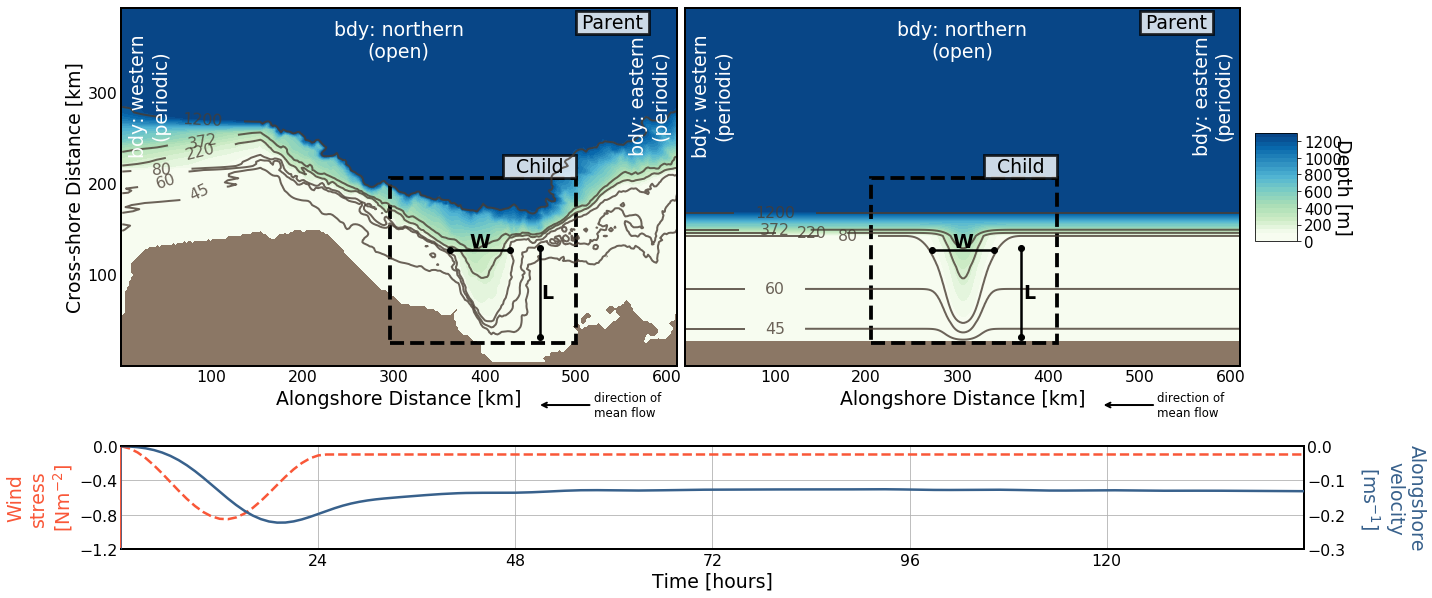

In [15]:
fig = plt.figure(figsize=(20, 9.5))
gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,0.1], height_ratios=[1,0.2])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
cax = plt.subplot(gs[0, 2])
axlong = fig.add_subplot(gs[1, :])

lw, ms, fs_numb, fs_str = 2.5, 12, 25*0.63, 30*0.63

for ax in ([ax2]):
    ax.yaxis.set_tick_params(labelbottom=False)
ax1.set_ylabel('Cross-shore Distance [km]', fontsize=fs_str, labelpad=3)

ax1, ax2, cax = plot_domain(ax1, ax2, cax, ideal, real, maskfi, maskfr)
axlong = plot_winds_currents(axlong)
# ax3 = plot_arctic(ax3, maskfr, x, y, z)
# ax4, ax5 = plot_conditions(ax4, ax5, winds, currents)

fig.tight_layout()
fig.patch.set_facecolor('white')    
plt.subplots_adjust(wspace=0.02, hspace=0.001)

fig.savefig('./present_domain.png', dpi=200, bbox_inches='tight', format='png', facecolor=fig.get_facecolor())